# Longitudinal changes in mean S and R MICs
Code to obtain a plot for a single PA pair

In [7]:
from functions import *

In [8]:
DF, pL, bP, drugs=read_dataset('data/')

In [9]:
DFt=pd.read_csv('results/Rcluster/resistant_cluster_trends_noBP.csv')

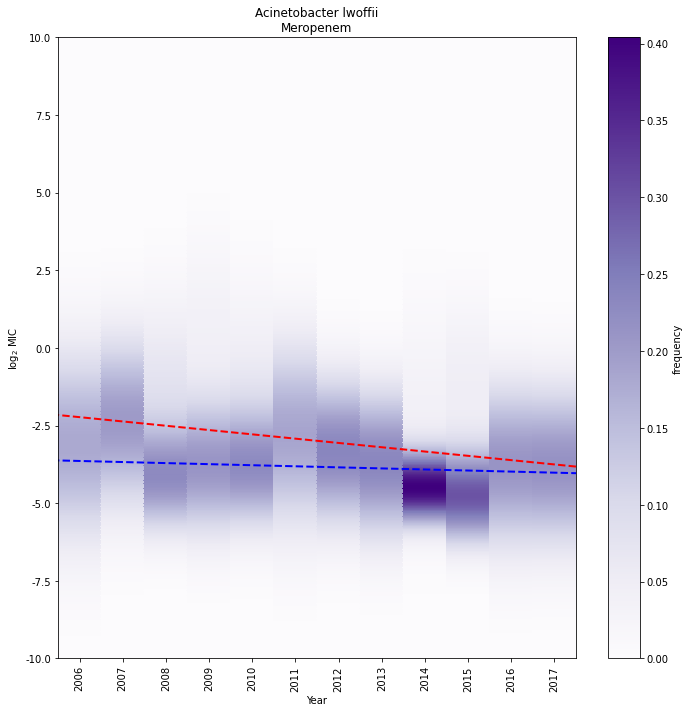

In [38]:
sp='Acinetobacter lwoffii'
#dr='Doripenem' %Try this PA pair for the exception 
dr='Meropenem'
pY,pM,sM=mic_dist(sp,dr,DF,bP[sp][dr][0])
if not pY:
    print('MIC distribution can not be computed as there are no years with mic data for at least 10 samples of this PA pair')
else:
    #print(pY)
    color1='blue'#blue-ish
    color2='red'#reddish
    title=sp+'\n'+dr
    fig=plt.figure(figsize=(10,10))
    ax=plt.gca()
    Z, pY=read_micdist(sp,dr)
    H=plot_micdist(Z,pY,fig,ax,title)
    #PLOT TRENDS OVER HEATMAP
    DFc=DFt[(DFt.Species==sp) & (DFt.Antibiotic==dr)]
    xp=np.linspace(2003,2020,100)
    #global trend
    Gi=DFc.Intercept.mean()
    Gs=DFc.Trend.mean()
    yp=[Gi+z*Gs for z in xp]
    #R cluster trend
    Ri=DFc.RIntercept.mean()
    Rs=DFc.Rtrend.mean()
    yp=[Ri+z*Rs for z in xp]
    ax.plot(xp,yp,'--', color=color2,lw=2)
    #S cluster trend
    Si=DFc.SIntercept.mean()
    Ss=DFc.Strend.mean()
    yp=[Si+z*Ss for z in xp]
    ax.plot(xp,yp,'--', color=color1,lw=2)        
    ax.set_xlim([min(pY), max(pY)+1])

    fig.tight_layout()
    filename = '{}_{}.eps'.format(sp,dr)
    #fig.savefig('figures/2/'+filename)